# 2.0 DATA UNDERSTANDING STAGE

### 2.1 libraries

##### 2.1 -1 Install required libraries 

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install requests
# !pip install matplotlib

##### 2.1 -2 Import Required libraries

In [2]:
import numpy as np
import pandas as pd
import requests
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

import plotly.graph_objs as go # bar and pie charts, Plotly
import plotly
import plotly.figure_factory as ff
import plotly.offline as plof

## 2.2 Gathering data

#### 2.2 -1 importing data

In [3]:
# URL of the zipped folder
url = "https://archive.ics.uci.edu/static/public/179/secom.zip"

# download the zipped folder using request library
zip_file = requests.get(url)

# opening the zipped folder
secom_files =  zipfile.ZipFile(BytesIO(zip_file.content), 'r')

# printing the file names inside the zip
secom_files_names =  (zipfile.ZipFile(BytesIO(zip_file.content))).namelist()
print(secom_files_names)

['secom.data', 'secom.names', 'secom_labels.data']


In [4]:
# reading the relevant files 

f_file = secom_files.open('secom.data')
l_file = secom_files.open('secom_labels.data')
n_file = secom_files.open('secom.names')


#### 2.2 -2 labels data

In [5]:
#Create column names and pandas dataframes for labels data

l_column_names=['classifications', 'date_time'] #### create column labels

labels_df = pd.read_csv(l_file, sep=r'\s+', header=None, names= l_column_names)

print(f"Dimensions of Labels data: ", labels_df.shape)

print(labels_df.head(5))

Dimensions of Labels data:  (1567, 2)
   classifications            date_time
0               -1  19/07/2008 11:55:00
1               -1  19/07/2008 12:32:00
2                1  19/07/2008 13:17:00
3               -1  19/07/2008 14:43:00
4               -1  19/07/2008 15:22:00


In [6]:
labels_df.isna().sum()

classifications    0
date_time          0
dtype: int64

In [7]:
# checking the order of data time

labels_df['date_time'] = pd.to_datetime(labels_df['date_time'], format='%d/%m/%Y %H:%M:%S')

is_ascending = labels_df['date_time'].is_monotonic_increasing

if is_ascending:
    print("The timestamps column is in ascending (oldest to newest) order.")
else:
    print("The timestamps column is not in ascending (newest to oldest) order.")

The timestamps column is in ascending (oldest to newest) order.


### 2-2 -3 feature.data

In [8]:
# adding column name as "feature-##"
f_column_names = [f"feature_{i}" for i in range(1, 592)]

features_df = pd.read_csv(f_file, sep=r'\s+', header=None, names= f_column_names)
print(f"Dimensions of Features' data: ", features_df.shape)
print("---------------------------------------------------------")
print(features_df.head())

Dimensions of Features' data:  (1567, 591)
---------------------------------------------------------
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0   
3    2988.72    2479.90  2199.0333   909.7926     1.3204      100.0   
4    3032.24    2502.87  2233.3667  1326.5200     1.5334      100.0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_582  feature_583  \
0    97.6133     0.1242     1.5005      0.0162  ...          NaN       0.5005   
1   102.3433     0.1247     1.4966     -0.0005  ...     208.2045       0.5019   
2    95.4878     0.1241     1.4436      0.0041  ...      82.8602       0.4958   
3   104.2367     0.1217     1.4882     -0.0124  ...      73.8432       0.4990   
4   100.3967     0.1235     1.5031     -0.0031  ...          NaN   

### 2-2 -4 merging

In [9]:
# merging 

merged_df = pd.merge(labels_df, features_df, left_index=True, right_index=True)

print(f"Dimensions of merged data: ", merged_df.shape)

print(merged_df.head())


Dimensions of merged data:  (1567, 593)
   classifications           date_time  feature_1  feature_2  feature_3  \
0               -1 2008-07-19 11:55:00    3030.93    2564.00  2187.7333   
1               -1 2008-07-19 12:32:00    3095.78    2465.14  2230.4222   
2                1 2008-07-19 13:17:00    2932.61    2559.94  2186.4111   
3               -1 2008-07-19 14:43:00    2988.72    2479.90  2199.0333   
4               -1 2008-07-19 15:22:00    3032.24    2502.87  2233.3667   

   feature_4  feature_5  feature_6  feature_7  feature_8  ...  feature_582  \
0  1411.1265     1.3602      100.0    97.6133     0.1242  ...          NaN   
1  1463.6606     0.8294      100.0   102.3433     0.1247  ...     208.2045   
2  1698.0172     1.5102      100.0    95.4878     0.1241  ...      82.8602   
3   909.7926     1.3204      100.0   104.2367     0.1217  ...      73.8432   
4  1326.5200     1.5334      100.0   100.3967     0.1235  ...          NaN   

   feature_583  feature_584  feature_585

In [10]:
merged_data = merged_df.drop(columns = "date_time", axis=1)
merged_data

,classifications,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,feature_591
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,NaN
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,NaN
2,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,NaN
3,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,NaN
4,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,NaN
1563,-1,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,NaN
1564,-1,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,NaN
1565,-1,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,NaN


count    591.000000
mean       5.299320
std        9.559892
min      -22.169909
25%        0.000000
50%        0.977121
75%        6.468798
max       39.562779
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
classifications    3.487359
feature_1          0.513657
feature_2         -0.043066
feature_3         -0.305764
feature_4          1.711627
                     ...   
feature_587        1.438025
feature_588        1.947408
feature_589        2.029372
feature_590        2.714475
feature_591             NaN
Length: 592, dtype: float64


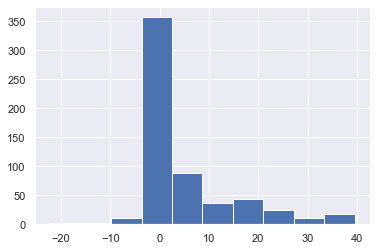

In [70]:
sns.set_theme()
print(merged_data.skew().describe())
print(merged_data.skew().hist())

print(merged_data.skew())

In [81]:
from scipy.stats import skew, kurtosis

# Calculate skewness for each column
skewness_threshold = 20
skewness_levels = {}

for column in merged_data.columns:
    skewness = kurtosis(merged_data[column].dropna())
    skewness_levels[column] = skewness

# Filter columns where skewness is higher than the threshold
high_skew_columns = [column for column, skewness in skewness_levels.items() if skewness > skewness_threshold]

# Select columns that meet the condition
selected_columns = merged_data[high_skew_columns]

print(len(selected_columns.columns))

216


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1216: RuntimeWarning:

Mean of empty slice.

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning:

invalid value encountered in true_divide

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



<AxesSubplot:>

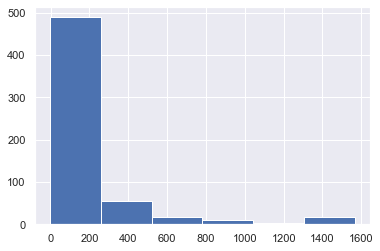

In [74]:
merged_data.kurtosis().hist(bins=6)

In [80]:
from scipy.stats import kurtosis

kurtosis_threshold = 20
kurtosis_levels = {}

for column in merged_data.columns:
    kurtosis = kurtosis(merged_data[column])
    kurtosis_levels[column] = kurtosis
    
# Filter columns kurtosis is higher than the threshold
high_kurtosis_columns = [column for column, kurtosis in kurtosis_levels.items() if kurtosis > kurtosis_threshold]

# Select columns that meet the condition
selected_columns = merged_data[high_kurtosis_columns]

print(len(selected_columns.columns))

TypeError: 'float' object is not callable

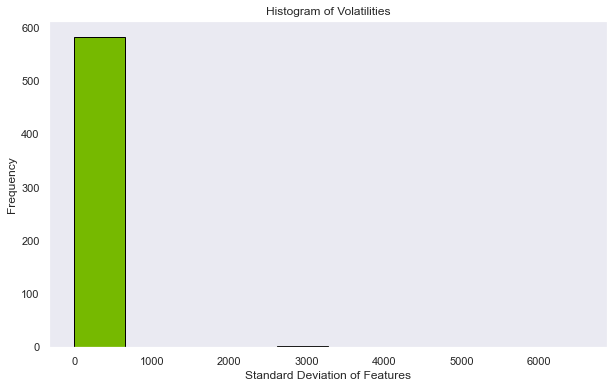

In [91]:
import matplotlib.pyplot as plt
# Calculate volatilities (standard deviations) for each column
volatilities = features_df.std()

sns.set_theme()
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(volatilities, bins=10, color='#76B900', edgecolor='black')
plt.xlabel('Standard Deviation of Features')
plt.ylabel('Frequency')
plt.title('Histogram of Volatilities')
plt.grid(False)
plt.show()

In [157]:
print(len(volatilities))
print((volatilities < 500 ).sum())

x = range(1, 5)
print()
print("std_dev : counts")
for n in x:
 xaxis = n * 500
 print(f"   {xaxis} : {(volatilities < xaxis ).sum()}")
 print( f"          {round( ( (volatilities < xaxis ).sum() / len(volatilities) * 100 ) , 2 )} %")
 print()
 




591
579

std_dev : counts
   500 : 579
          97.97 %

   1000 : 584
          98.82 %

   1500 : 585
          98.98 %

   2000 : 586
          99.15 %



## 2-3 Data Visualisation

In [11]:
print(merged_data.isna().sum())
print("\n===============================================================\n")
print(merged_data.describe().describe())


classifications       0
feature_1             6
feature_2             7
feature_3            14
feature_4            14
                   ... 
feature_587           1
feature_588           1
feature_589           1
feature_590           1
feature_591        1567
Length: 592, dtype: int64


       classifications    feature_1    feature_2    feature_3    feature_4  \
count         8.000000     8.000000     8.000000     8.000000     8.000000   
mean        195.453844  2472.883085  2078.990367  1844.894221  1383.052958   
std         554.188900  1109.001613   891.252031   770.362628  1096.086719   
min          -1.000000    73.621787    80.407705    29.513152     0.000000   
25%          -1.000000  2447.680000  2009.062500  1933.745000   921.829760   
50%          -0.933631  2988.875000  2474.048865  2190.795859  1340.795514   
75%           0.623508  3025.002172  2509.259375  2205.313900  1562.555875   
max        1567.000000  3356.350000  2846.440000  2315.266700  3715.041700   

     

### 2-3 -1 Target value

In [12]:
# import plotly.offline as plof
# import plotly.graph_objs as go

result_fail = merged_data[merged_data['classifications'] != -1]
result_pass = merged_data[merged_data['classifications'] == -1]

print(f"The number of failure: {len(result_fail)} \nThe number of pass:    {len(result_pass)}")

trace = go.Bar(x = (len(result_fail), len(result_pass)), 
               y = ['Fail ', 'Pass '], 
               orientation = 'h', 
               opacity = 0.8, 
               marker=dict(
                       color=[ 'grey', 'green'],
                       line=dict(color='#000000',width=1.5)
                       )
               )

layout = dict(title =  'Count of target variable for faile and pass data')
                    
fig = dict(data = [trace], layout=layout)
plotly.offline.iplot(fig)


#Then, we will plot the percentage
trace = go.Pie(labels = ['Pass ', 'Fail '], 
               values = labels_df['classifications'].value_counts(), 
               textfont=dict(size=30), opacity = 0.8,
               marker=dict(colors=['green', 'grey'], 
                           line=dict(color='#000000', 
                                     width=1.5)
                           )
               )


layout = dict(title =  'Count of target variable for faile and pass data')
           
fig = dict(data = [trace], layout=layout)
plof.offline.iplot(fig)

The number of failure: 104 
The number of pass:    1463


### 2-3 -2 Other Variables / Features 

In [13]:
# missing values

merged_noNull = merged_data.dropna(axis=1)

print(merged_data.shape)
print(merged_noNull.shape) 


(1567, 592)
(1567, 53)


In [14]:
merged_noNull.head(2)

,classifications,feature_21,feature_87,feature_88,feature_89,feature_114,feature_115,feature_116,feature_117,feature_118,...,feature_527,feature_528,feature_571,feature_572,feature_573,feature_574,feature_575,feature_576,feature_577,feature_578
0,-1,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,...,0.5064,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509
1,-1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,...,0.8832,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003


In [15]:
col_name = merged_noNull.columns.tolist()
calssifications = col_name.pop(0)
col_name

['feature_21',
 'feature_87',
 'feature_88',
 'feature_89',
 'feature_114',
 'feature_115',
 'feature_116',
 'feature_117',
 'feature_118',
 'feature_120',
 'feature_121',
 'feature_157',
 'feature_222',
 'feature_223',
 'feature_224',
 'feature_249',
 'feature_250',
 'feature_251',
 'feature_252',
 'feature_253',
 'feature_255',
 'feature_256',
 'feature_292',
 'feature_360',
 'feature_361',
 'feature_362',
 'feature_387',
 'feature_388',
 'feature_389',
 'feature_390',
 'feature_391',
 'feature_393',
 'feature_394',
 'feature_430',
 'feature_494',
 'feature_495',
 'feature_496',
 'feature_521',
 'feature_522',
 'feature_523',
 'feature_524',
 'feature_525',
 'feature_527',
 'feature_528',
 'feature_571',
 'feature_572',
 'feature_573',
 'feature_574',
 'feature_575',
 'feature_576',
 'feature_577',
 'feature_578']

In [16]:
# import plotly.figure_factory as ff
# import plotly.offline as plof

def plot_distribution(data_select, size_bin) :  
    tmp1 = result_fail[data_select]
    tmp2 = result_pass[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['fail', 'pass']
    colors = ['#228C22', '#0000FF']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select, xaxis_title='Observed Value', yaxis_title="frequency",)

    plof.iplot(fig, filename = 'Density plot for faile and pass')

In [17]:
plot_distribution('feature_21', 0.5)

### 2-3 -3 Correlation matrix

#### 2-3 -3-1 correlation between features without any null values

In [19]:
merged_noNull.iloc[:,1:-1]

,feature_21,feature_87,feature_88,feature_89,feature_114,feature_115,feature_116,feature_117,feature_118,feature_120,...,feature_525,feature_527,feature_528,feature_571,feature_572,feature_573,feature_574,feature_575,feature_576,feature_577
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,4.8560,0.5064,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,6.6475,0.8832,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,7.0870,0.6451,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,5.4751,0.7404,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,4.4146,2.2181,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.4072,2.3762,0.9861,1869.4215,0.9520,0.0,727.6761,0.9894,58.3514,0.9636,...,6.0178,1.2587,2.6649,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879
1563,1.3949,2.4880,0.9911,1872.5133,0.9561,0.0,755.7527,0.9899,57.1020,0.9806,...,4.6482,0.4512,6.0192,537.9264,2.1814,5.48,0.3891,1.9077,0.1213,1.0187
1564,1.4256,2.4590,0.9869,1820.3629,0.9488,0.0,704.2686,0.9891,59.2046,0.9767,...,6.2114,0.4867,5.4641,530.3709,2.3435,6.49,0.4154,2.1760,0.1352,1.2237
1565,1.3868,2.3600,0.9796,1627.4714,0.9485,0.0,605.6190,0.9896,58.2686,0.9805,...,6.6428,0.3866,6.5512,534.3936,1.9098,9.13,0.3669,3.2524,0.1040,1.7085


In [20]:
#correlation
correlation = merged_noNull.iloc[:,1:-1].corr()

#tick labels
matrix_cols = correlation.columns.tolist()

#convert to array
corr_array  = np.array(correlation)

In [21]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Rainbow',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
plof.iplot(fig)

#### 2-3 -3-2 correlation between top 30 correalted values

In [22]:
# Create a function to determine highly correlated pair of features above threshold of 0.95
# Determine which features to drop according to Munirathinam & Ramadoss (2016)
# Among each pair, Drop the feature with the highest average correlation with all features
def find_highly_correlated_pairs(df, correlation_threshold=0.95):
    # Step 1: Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Step 2: Find pairs of predictors with correlation >= threshold
    high_correlation_pairs = []
    columns = correlation_matrix.columns
    
    # Loop over the upper triangle of the correlation matrix (excluding diagonal)
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
                high_correlation_pairs.append((columns[i], columns[j]))

    # Step 3: Create a DataFrame to store the pairs and their correlations
    high_corr_df = pd.DataFrame(high_correlation_pairs, columns=['Predictor_A', 'Predictor_B'])
    high_corr_df['Correlation'] = [
        correlation_matrix.loc[pair[0], pair[1]] for pair in high_correlation_pairs
    ]
    
    # Step 4: Calculate average correlation with other predictors for each element of each pair
    avg_correlation = {}
    
    for col in columns:
        # Calculate the average correlation of a predictor with all others excluding itself
        avg_correlation[col] = correlation_matrix[col].drop(col).abs().mean()
    
    # Add the average correlation to the DataFrame
    high_corr_df['Avg_Corr_A'] = high_corr_df['Predictor_A'].apply(lambda x: avg_correlation[x])
    high_corr_df['Avg_Corr_B'] = high_corr_df['Predictor_B'].apply(lambda x: avg_correlation[x])

    # Step 5: Determine which element has the higher average correlation with other predictors
    # You need to compare the values for each row and assign the predictor with the higher correlation
    high_corr_df['highest_to_delete'] = high_corr_df.apply(
        lambda row: row['Predictor_A'] if row['Avg_Corr_A'] > row['Avg_Corr_B'] else row['Predictor_B'], axis=1
    )

    return high_corr_df

In [23]:
# Create a dataframe to determine the highly correlated pair of features
correlation_result = find_highly_correlated_pairs(correlation, correlation_threshold=0.95)
print(correlation_result.head())
print(correlation_result.tail())

# Determine the List of unique Features to Drop
features_to_drop =correlation_result['highest_to_delete']
features_to_drop_unq =correlation_result['highest_to_delete'].unique()
# Print the first 5 features and the number of features to drop
print(features_to_drop_unq[1:6])

print("Number of highly correlated Features to drop:", len(features_to_drop))

print("Unique number of highly correlated Features to drop:", len(features_to_drop_unq))



   Predictor_A  Predictor_B  Correlation  Avg_Corr_A  Avg_Corr_B  \
0  feature_115  feature_250     0.999583    0.195849    0.195900   
1  feature_115  feature_388     0.999615    0.195849    0.195896   
2  feature_118  feature_253     0.998528    0.165673    0.168508   
3  feature_118  feature_391     0.998545    0.165673    0.168476   
4  feature_118  feature_525     0.995203    0.165673    0.173319   

  highest_to_delete  
0       feature_250  
1       feature_388  
2       feature_253  
3       feature_391  
4       feature_525  
    Predictor_A  Predictor_B  Correlation  Avg_Corr_A  Avg_Corr_B  \
44  feature_574  feature_576     0.999225    0.160131    0.158600   
45  feature_574  feature_577     0.963690    0.160131    0.160158   
46  feature_575  feature_576     0.958001    0.160632    0.158600   
47  feature_575  feature_577     0.999648    0.160632    0.160158   
48  feature_576  feature_577     0.959632    0.158600    0.160158   

   highest_to_delete  
44       feature_574 

In [24]:
threshold = 0.95
threshold_plus = threshold
threshold_minus = threshold * -1

# Compute the correlation matrix
correlation_matrix1 = features_df.corr()

# Create a mask to remove the lower triangle and diagonal
mask = np.triu(np.ones_like(correlation_matrix1, dtype=bool))
correlation_matrix1[~mask] = np.nan
# List of pairs of columns with correlations above 0.95
high_correlation_pairs1 = []

# Iterate over the upper triangle of the correlation matrix
for i in range(len(correlation_matrix1.columns)):
    for j in range(i + 1, len(correlation_matrix1.columns)):
        if correlation_matrix1.iloc[i, j] > threshold_plus or correlation_matrix1.iloc[i, j] < threshold_minus:
            column1 = correlation_matrix1.columns[i]
            column2 = correlation_matrix1.columns[j]
            high_correlation_pairs1.append((column1, column2))

# Output the high-correlation pairs
print(f"Number of Columns with correlations below {threshold_minus} or above {threshold_plus} :")
print(len(high_correlation_pairs1))

Number of Columns with correlations below -0.95 or above 0.95 :
329


In [25]:
# Select first 30 sets of highly correlated features
# Create a list of unique feature which are highly correlated
first_30 = high_correlation_pairs1[:30]
unique_30_set = set()

# Iterate through each pair and add the elements and create a unique list
for pair in first_30:
    unique_30_set.update(pair)

# Convert the set to a sorted list
unique_30_list = sorted(list(unique_30_set))
print(len(unique_30_list))

45


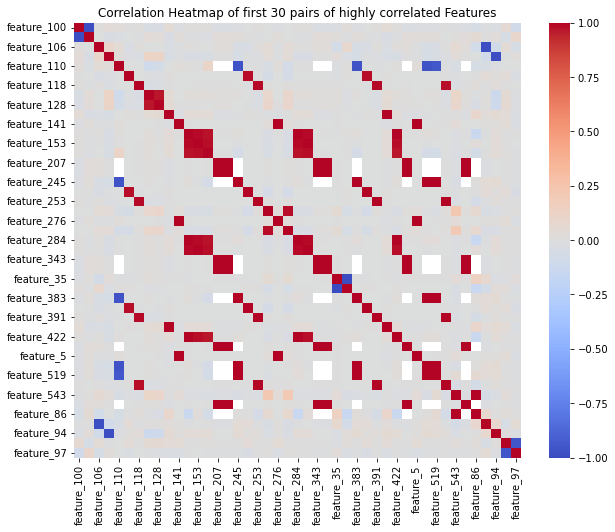

In [26]:
# Create a dataframe of first 30 highly correlated features
unique_30_df = pd.DataFrame(features_df, columns=unique_30_list)

unique_30_matrix= unique_30_df.corr()

# Visualise the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(unique_30_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of first 30 pairs of highly correlated Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.show()

In [27]:
# sns.pairplot(unique_30_df)
# plt.show()

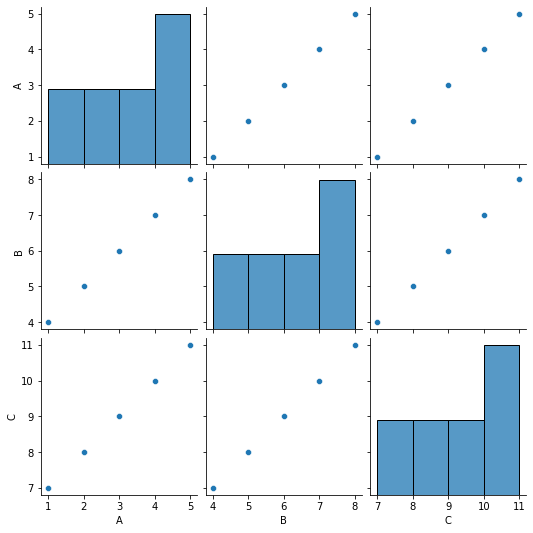

In [28]:
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [4, 5, 6, 7, 8],
    'C': [7, 8, 9, 10, 11]
}
df = pd.DataFrame(data)

# Create a pairplot
sns.pairplot(df)

# Display the pairplot
plt.show()

# Data Preparation

#### 3.2 splitting training and test dataset

In [29]:
# # separating the merged df into pass and fail    #### preparing for constrained data splitting 

# failed_chip = merged_df[merged_df["classifications"] == 1]
# passed_chip = merged_df[merged_df["classifications"] == -1]

# print(f"passed chips are: {len(passed_chip)} \nfailed chips are: {len(failed_chip)}")


In [30]:
# # splitting the failed into 25% and 75% 

# train_data_failed, test_data_failed = train_test_split(failed_chip, test_size=0.2, random_state=42)

# print(f"failed chips for training are: {len(train_data_failed)} \nfailed chips for testing are:  {len(test_data_failed)}")
# print(f"the percentage of the testing is {round( len(test_data_failed) / len(train_data_failed ), 4) * 100} %")

In [31]:
# splitting the passed into 25% and 75% 

train_data_passed, test_data_passed = train_test_split(passed_chip, test_size=0.2, random_state=42)

print(f"passed chips for training are: {len(train_data_passed)} \npassed chips for testing are:  {len(test_data_passed)}")
print(f"the percentage of the testing is {round( len(test_data_passed) / len(train_data_passed ), 3) * 100} %")

NameError: name 'passed_chip' is not defined

In [ ]:
# combining the train_failed and train_passed
training_df = pd.concat([train_data_failed, train_data_passed])
### counting the num of rows to check if it's properly combined 
print(len(training_df))
print(f"check: train_failed {len(train_data_failed)} + train_passed {len(train_data_passed)} = {len(train_data_failed) + len(train_data_passed)}")

print("---------------------------------------------------------------")

# combining the testing_failed and testing_passed  
testing_df = pd.concat([test_data_failed, test_data_passed])
### counting the num of rows to check if it's properly combined 
print(len(testing_df))
print(f"check: train_failed {len(test_data_failed)} + train_passed {len(test_data_passed)} = {len(test_data_failed) + len(test_data_passed)}")

